# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

# Task 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Read the Data

In [ ]:
df = pd.read_csv("car_data.csv")

# Data Cleaning

In [ ]:
df.drop_duplicates()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [ ]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [ ]:
df['Model'].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [ ]:
df['Type'].unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

# Data Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Make']=le.fit_transform(df['Make'])
df['Model']=le.fit_transform(df['Model'])
df['Type']=le.fit_transform(df['Type'])
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,0,10,Sedan 4D,3,6,3.1,4,1,1,1
1,17542.036083,9135,0,10,Sedan 4D,3,6,3.1,4,1,1,0
2,16218.847862,13196,0,10,Sedan 4D,3,6,3.1,4,1,1,0
3,16336.913140,16342,0,10,Sedan 4D,3,6,3.1,4,1,0,0
4,16339.170324,19832,0,10,Sedan 4D,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,5,21,L300 Sedan 4D,3,6,3.0,4,1,0,0
800,16175.957604,19095,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0
801,15731.132897,20484,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0
802,15118.893228,25979,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0


In [ ]:
df[['Price','Mileage']].corr()

,Price,Mileage
Price,1.000000,-0.143051
Mileage,-0.143051,1.000000


### The corelation between price and mileage is less so im going to try transfor the data and look for outliers

In [ ]:
df['Mileage2']=np.sqrt(df['Mileage'])
df[['Mileage2','Price']].corr()

,Mileage2,Price
Mileage2,1.000000,-0.149316
Price,-0.149316,1.000000


In [ ]:
df['Mileage3']=(df['Mileage']**2)
df[['Mileage3','Price']].corr()

,Mileage3,Price
Mileage3,1.000000,-0.117232
Price,-0.117232,1.000000


In [ ]:
df['Mileage4']=np.log(df['Mileage'])
df[['Mileage4','Price']].corr()

,Mileage4,Price
Mileage4,1.000000,-0.145424
Price,-0.145424,1.000000


In [ ]:
df['Mileage5']=(df['Mileage']/1000)
df[['Mileage5','Price']].corr()

,Mileage5,Price
Mileage5,1.000000,-0.143051
Price,-0.143051,1.000000


In [ ]:
df['Mileage6']=np.exp(df['Mileage'])
df[['Mileage6','Price']].corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Mileage6,Price
Mileage6,NaN,-0.0
Price,-0.0,1.0


# EDA

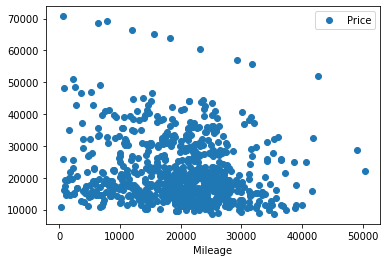

In [ ]:
df.plot('Mileage','Price',style='o')
plt.show()

In [ ]:
df['Mileage'].max()

50387

In [ ]:
df['Price'].max()

70755.4667165429

### Looking for outliers

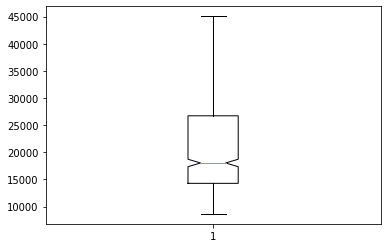

In [ ]:
plt.boxplot(df['Price'],notch=True,sym='')
plt.show()#45383

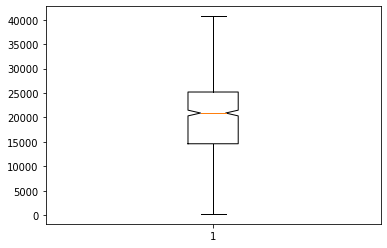

In [ ]:
plt.boxplot(df['Mileage'],notch=True,sym='')
plt.show()#41097

In [ ]:
df1=df[(df['Mileage'].between(0,41097))&(df['Price'].between(0,45383))]
df1

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Mileage2,Mileage3,Mileage4,Mileage5,Mileage6
0,17314.103129,8221,0,10,Sedan 4D,3,6,3.1,4,1,1,1,90.669730,67584841,9.014447,8.221,inf
1,17542.036083,9135,0,10,Sedan 4D,3,6,3.1,4,1,1,0,95.577194,83448225,9.119868,9.135,inf
2,16218.847862,13196,0,10,Sedan 4D,3,6,3.1,4,1,1,0,114.873844,174134416,9.487669,13.196,inf
3,16336.913140,16342,0,10,Sedan 4D,3,6,3.1,4,1,0,0,127.835832,267060964,9.701494,16.342,inf
4,16339.170324,19832,0,10,Sedan 4D,3,6,3.1,4,1,0,1,140.826134,393308224,9.895052,19.832,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,5,21,L300 Sedan 4D,3,6,3.0,4,1,0,0,127.393092,263380441,9.694555,16.229,inf
800,16175.957604,19095,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0,138.184659,364619025,9.857182,19.095,inf
801,15731.132897,20484,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0,143.122325,419594256,9.927399,20.484,inf
802,15118.893228,25979,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0,161.180024,674908441,10.165044,25.979,inf


In [ ]:
df1[['Price','Mileage']].corr()

,Price,Mileage
Price,1.000000,-0.111189
Mileage,-0.111189,1.000000


Again corelation between two coloums is less so i continued to next step

In [ ]:
df['Type'].unique()

array([3, 0, 2, 1, 4])

## Splitting the data

In [ ]:
x=df1.iloc[:,1]
x= x.to_frame()
y=df1.iloc[:,0].values
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)
xtrain,xtest

(     Mileage
 721    14613
 614    21307
 591    17830
 424    21420
 123    13449
 ..       ...
 536    20917
 7      22964
 750    17656
 178    30948
 553    21304
 
 [626 rows x 1 columns],      Mileage
 762    30108
 294    22382
 524    20870
 437    21452
 52     19562
 ..       ...
 86     23751
 258    21386
 598    25285
 467    22729
 511     5690
 
 [157 rows x 1 columns])

## Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

## Model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(xtrain,ytrain)
print(regressor.intercept_)
print(regressor.coef_)

20295.12975015874
[-898.48549821]


## Prediction

In [ ]:
ypred=regressor.predict(xtest)
ypred

array([19138.68356169, 20022.28619102, 20195.20971879, 20128.64788469,
       20344.8022944 , 18851.50698879, 19863.88732464, 21436.78234939,
       19866.06030548, 22063.1726679 , 19895.45273051, 22088.21913125,
       20586.23190228, 20344.45919216, 20256.51065191, 20984.00176312,
       20635.52425709, 19705.37409086, 19471.37836479, 21078.69798071,
       20022.51492585, 21827.46143064, 20351.89307398, 20314.15182784,
       19679.41268821, 19449.07671934, 20970.04893879, 21556.52503032,
       20070.54923911, 20251.93595541, 19981.34265733, 21665.17407224,
       19881.61427359, 19570.99238111, 20631.75013248, 20341.37127202,
       20041.84301857, 20929.21977251, 20725.30267594, 20011.192552  ,
       20166.50349824, 21426.71801708, 20643.41560856, 19632.06457941,
       20068.94809534, 22144.2591634 , 19163.50129021, 20289.79156897,
       19579.91303929, 20292.99385652, 20491.76441952, 19444.04455319,
       21250.0203647 , 19937.76867315, 20478.72653449, 19431.92160746,
      

## Loss function and Evaluation metrics

In [ ]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred))
print('R2- SCORE:', metrics.r2_score(ytest,ypred))

Mean Absolute Error: 7475.030548424104
Mean Squared Error: 83300154.13958007
R2- SCORE: -0.00618348016587511


## R2 value is lesser so we declare this is a bad model

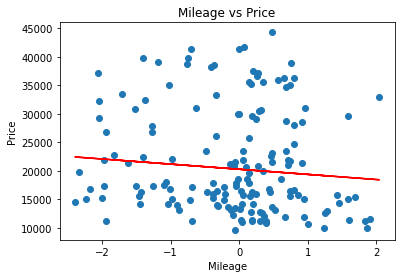

In [ ]:
plt.scatter(xtest,ytest)
plt.plot(xtest,regressor.predict(xtest),color='r')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Task 2

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Make']=le.fit_transform(df['Make'])
df['Model']=le.fit_transform(df['Model'])
df['Type']=le.fit_transform(df['Type'])
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,0,10,Sedan 4D,3,6,3.1,4,1,1,1
1,17542.036083,9135,0,10,Sedan 4D,3,6,3.1,4,1,1,0
2,16218.847862,13196,0,10,Sedan 4D,3,6,3.1,4,1,1,0
3,16336.913140,16342,0,10,Sedan 4D,3,6,3.1,4,1,0,0
4,16339.170324,19832,0,10,Sedan 4D,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,5,21,L300 Sedan 4D,3,6,3.0,4,1,0,0
800,16175.957604,19095,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0
801,15731.132897,20484,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0
802,15118.893228,25979,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0


In [ ]:
df.corr()#mileage, cylinders, liters, doors, cruise, sound, and leather

,Price,Mileage,Make,Model,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,-0.131644,-0.026599,-0.163871,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,0.028632,-0.026810,-0.006547,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Make,-0.131644,0.028632,1.000000,-0.295619,-0.055916,-0.474727,-0.421690,-0.142858,-0.124232,-0.124200,-0.065295
Model,-0.026599,-0.026810,-0.295619,1.000000,0.021669,0.359248,0.347102,-0.027162,-0.088165,0.022747,-0.082459
Type,-0.163871,-0.006547,-0.055916,0.021669,1.000000,-0.067134,-0.112378,0.907163,-0.017463,-0.094508,-0.074930
Cylinder,0.569086,-0.029461,-0.474727,0.359248,-0.067134,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,-0.421690,0.347102,-0.112378,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,-0.142858,-0.027162,0.907163,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,-0.124232,-0.088165,-0.017463,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.124200,0.022747,-0.094508,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444


In [ ]:
#del df['Doors']

In [ ]:
#del df['Leather']

In [ ]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,0,10,Sedan 4D,3,6,3.1,4,1,1,1
1,17542.036083,9135,0,10,Sedan 4D,3,6,3.1,4,1,1,0
2,16218.847862,13196,0,10,Sedan 4D,3,6,3.1,4,1,1,0
3,16336.913140,16342,0,10,Sedan 4D,3,6,3.1,4,1,0,0
4,16339.170324,19832,0,10,Sedan 4D,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,5,21,L300 Sedan 4D,3,6,3.0,4,1,0,0
800,16175.957604,19095,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0
801,15731.132897,20484,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0
802,15118.893228,25979,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0


### corelation between mileage,doors,sound,leather is less cylinder,liter and cruise is better with price

Text(0, 0.5, 'Leather')

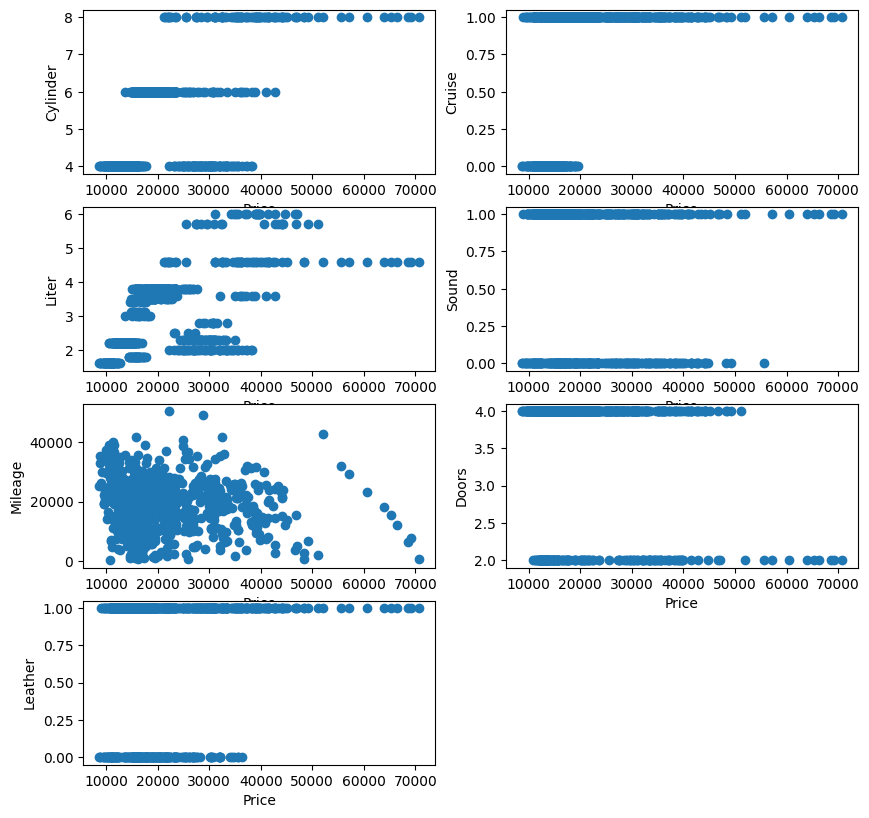

In [ ]:
fig=plt.figure(figsize=(10,10),dpi=100)
ap=fig.add_subplot(421)
ap.scatter(df['Price'],df['Cylinder'],marker='o')
ap.set_xlabel('Price')
ap.set_ylabel('Cylinder')
ap=fig.add_subplot(422)
ap.scatter(df['Price'],df['Cruise'],marker='o')
ap.set_xlabel('Price')
ap.set_ylabel('Cruise')
ap=fig.add_subplot(423)
ap.scatter(df['Price'],df['Liter'],marker='o')
ap.set_xlabel('Price')
ap.set_ylabel('Liter')
ap=fig.add_subplot(424)
ap.scatter(df['Price'],df['Sound'],marker='o')
ap.set_xlabel('Price')
ap.set_ylabel('Sound')
ap=fig.add_subplot(425)
ap.scatter(df['Price'],df['Mileage'],marker='o')
ap.set_xlabel('Price')
ap.set_ylabel('Mileage')
ap=fig.add_subplot(426)
ap.scatter(df['Price'],df['Doors'],marker='o')
ap.set_xlabel('Price')
ap.set_ylabel('Doors')
ap=fig.add_subplot(427)
ap.scatter(df['Price'],df['Leather'],marker='o')
ap.set_xlabel('Price')
ap.set_ylabel('Leather')

In [ ]:
df['Mileage1']=np.sqrt(df['Mileage'])
df['Mileage2']=np.exp(df['Mileage'])
df['Mileage3']=np.log(df['Mileage'])
df['Mileage4']=(df['Mileage'])**2
df[['Price','Mileage','Mileage1','Mileage2','Mileage3','Mileage4']].corr()
#Mileage1 has better corr

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Price,Mileage,Mileage1,Mileage2,Mileage3,Mileage4
Price,1.000000,-0.143051,-0.149316,-0.0,-0.145424,-0.117232
Mileage,-0.143051,1.000000,0.980307,0.0,0.896948,0.954664
Mileage1,-0.149316,0.980307,1.000000,0.0,0.964210,0.882745
Mileage2,-0.000000,0.000000,0.000000,NaN,0.000000,0.000000
Mileage3,-0.145424,0.896948,0.964210,0.0,1.000000,0.751746
Mileage4,-0.117232,0.954664,0.882745,0.0,0.751746,1.000000


In [ ]:
df['Doors1']=np.sqrt(df['Doors'])
df['Doors2']=np.exp(df['Doors'])
df['Doors3']=np.log(df['Doors'])
df['Doors4']=(df['Doors'])**2
df[['Price','Doors','Doors1','Doors2','Doors3','Doors4']].corr()
#there is no change in corr

,Price,Doors,Doors1,Doors2,Doors3,Doors4
Price,1.00000,-0.13875,-0.13875,-0.13875,-0.13875,-0.13875
Doors,-0.13875,1.00000,1.00000,1.00000,1.00000,1.00000
Doors1,-0.13875,1.00000,1.00000,1.00000,1.00000,1.00000
Doors2,-0.13875,1.00000,1.00000,1.00000,1.00000,1.00000
Doors3,-0.13875,1.00000,1.00000,1.00000,1.00000,1.00000
Doors4,-0.13875,1.00000,1.00000,1.00000,1.00000,1.00000


In [ ]:
df['Sound1']=np.sqrt(df['Sound'])
df['Sound2']=np.exp(df['Sound'])
df['Sound3']=np.log(df['Sound'])
df['Sound4']=(df['Sound'])**2
df[['Price','Sound','Sound1','Sound2','Sound3','Sound4']].corr()
#here there is no change in corr

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Price,Sound,Sound1,Sound2,Sound3,Sound4
Price,1.000000,-0.124348,-0.124348,-0.124348,NaN,-0.124348
Sound,-0.124348,1.000000,1.000000,1.000000,NaN,1.000000
Sound1,-0.124348,1.000000,1.000000,1.000000,NaN,1.000000
Sound2,-0.124348,1.000000,1.000000,1.000000,NaN,1.000000
Sound3,NaN,NaN,NaN,NaN,NaN,NaN
Sound4,-0.124348,1.000000,1.000000,1.000000,NaN,1.000000


In [ ]:
df['Leather1']=np.sqrt(df['Leather'])
df['Leather2']=np.exp(df['Leather'])
df['Leather3']=np.log(df['Leather'])
df['Leather4']=(df['Leather'])**2
df[['Price','Leather','Leather1','Leather2','Leather3','Leather4']].corr()
#here there is no change in corr

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Price,Leather,Leather1,Leather2,Leather3,Leather4
Price,1.000000,0.157197,0.157197,0.157197,NaN,0.157197
Leather,0.157197,1.000000,1.000000,1.000000,NaN,1.000000
Leather1,0.157197,1.000000,1.000000,1.000000,NaN,1.000000
Leather2,0.157197,1.000000,1.000000,1.000000,NaN,1.000000
Leather3,NaN,NaN,NaN,NaN,NaN,NaN
Leather4,0.157197,1.000000,1.000000,1.000000,NaN,1.000000


In [ ]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,Doors3,Doors4,Sound1,Sound2,Sound3,Sound4,Leather1,Leather2,Leather3,Leather4
0,17314.103129,8221,0,10,Sedan 4D,3,6,3.1,4,1,...,1.386294,16,1.0,2.718282,0.0,1,1.0,2.718282,0.0,1
1,17542.036083,9135,0,10,Sedan 4D,3,6,3.1,4,1,...,1.386294,16,1.0,2.718282,0.0,1,0.0,1.000000,-inf,0
2,16218.847862,13196,0,10,Sedan 4D,3,6,3.1,4,1,...,1.386294,16,1.0,2.718282,0.0,1,0.0,1.000000,-inf,0
3,16336.913140,16342,0,10,Sedan 4D,3,6,3.1,4,1,...,1.386294,16,0.0,1.000000,-inf,0,0.0,1.000000,-inf,0
4,16339.170324,19832,0,10,Sedan 4D,3,6,3.1,4,1,...,1.386294,16,0.0,1.000000,-inf,0,1.0,2.718282,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,5,21,L300 Sedan 4D,3,6,3.0,4,1,...,1.386294,16,0.0,1.000000,-inf,0,0.0,1.000000,-inf,0
800,16175.957604,19095,5,21,L300 Sedan 4D,3,6,3.0,4,1,...,1.386294,16,1.0,2.718282,0.0,1,0.0,1.000000,-inf,0
801,15731.132897,20484,5,21,L300 Sedan 4D,3,6,3.0,4,1,...,1.386294,16,1.0,2.718282,0.0,1,0.0,1.000000,-inf,0
802,15118.893228,25979,5,21,L300 Sedan 4D,3,6,3.0,4,1,...,1.386294,16,1.0,2.718282,0.0,1,0.0,1.000000,-inf,0


# Splitting the data

In [ ]:
x=df[['Mileage1','Cruise','Liter','Cylinder','Doors','Sound','Leather']]
y=df['Price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x_train

,Mileage1,Cruise,Liter,Cylinder,Doors,Sound,Leather
367,164.255898,1,3.8,6,4,1,0
548,154.841855,0,2.2,4,4,1,1
380,25.219040,1,3.8,6,4,0,0
372,118.549568,1,3.8,6,4,1,1
251,72.034714,0,2.2,4,2,1,1
...,...,...,...,...,...,...,...
763,197.377810,0,2.2,4,2,0,0
192,120.942135,0,1.6,4,4,1,0
629,155.788318,0,1.8,4,4,0,0
559,177.400676,1,3.8,6,4,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(x_train,y_train)
x_train_scaled = scaler.transform(x_train) # fit (mean, sd) and then transform the training data
x_test_scaled = scaler.transform(x_test) # transform the test data 

# Model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Mileage1','Cruise','Liter','Cylinder','Doors','Sound','Leather'], columns=['Coefficient'])
y_pred = regressor.predict(x_test_scaled)
coeff_df

,Coefficient
Mileage1,-1368.785432
Cruise,2601.926177
Liter,-641.749427
Cylinder,5368.539420
Doors,-1153.023065
Sound,-1037.808180
Leather,1596.172078


In [ ]:
regressor.intercept_

21286.771470559215

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
8,14862.093870,26772.344186
575,16256.236168,22999.564452
616,15802.652861,10585.776460
142,45061.951935,32859.645383
236,12425.389171,14245.600575
...,...,...
524,18548.978593,23415.013832
116,36332.894685,33446.594642
37,21683.031464,20229.453782
453,18040.144006,31021.448259


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 6289.79203378445
Mean Squared Error: 59858077.48325715
R2- SCORE: 0.34546251137498407


## R2 value is less so we declare this is a bad model

# Feature selection

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(x_train_scaled, y_train)
list(zip(['Mileage1','Cruise','Liter','Cylinder','Doors','Sound','Leather'],selector.support_))

[('Mileage1', False),
 ('Cruise', True),
 ('Liter', False),
 ('Cylinder', True),
 ('Doors', False),
 ('Sound', False),
 ('Leather', True)]

## The combination of the factors that is the best predictor for price is cylinder and cruise

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso, Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1,1.5,1.7,2,2.5]:
  regressor = Ridge(normalize=True,alpha=alpha)
  cv_results = cross_validate(regressor, x, y, cv=5, scoring = "r2" , return_train_score=True)
  print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())

Alpha :  0.001 -5.086630068867192 0.4800084835293787
Alpha :  0.002 -5.067872192815345 0.4799442749922114
Alpha :  0.003 -5.050076136124918 0.47984604231462014
Alpha :  0.005 -5.017051501970733 0.47956981657023334
Alpha :  0.01 -4.946576248307528 0.4785925435763893
Alpha :  0.02 -4.840413835297229 0.4762374151082491
Alpha :  0.03 -4.762052571534989 0.4739551061459739
Alpha :  0.04 -4.700179076490182 0.4719212494256957
Alpha :  0.1 -4.476087024839616 0.4636746388858768
Alpha :  0.2 -4.297386376085204 0.45532162721236763
Alpha :  0.5 -4.191412764597063 0.4337771214341174
Alpha :  1 -4.453463877124724 0.3971456369119547
Alpha :  1.5 -4.830087789073031 0.3631293794561958
Alpha :  1.7 -4.9811604868177835 0.3506415912239892
Alpha :  2 -5.199497124021709 0.33314037585316336
Alpha :  2.5 -5.534236305656502 0.30706075034116126


In [ ]:
rr = Ridge(alpha=1)
rr.fit(x_test, y_test) 
pred_train_rr= rr.predict(x_test)
print(metrics.mean_squared_error(y_test,pred_train_rr))
print(metrics.r2_score(y_test, pred_train_rr))

56533557.47803047
0.381815549537851


In [ ]:
model_lasso = Lasso(alpha=1)
model_lasso.fit(x_test, y_test) 
pred_train_lasso= model_lasso.predict(x_test)
print(metrics.mean_squared_error(y_test,pred_train_lasso))
print(metrics.r2_score(y_test, pred_train_lasso))

56510779.99844326
0.3820646172478922
